# Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# Data Preprocessing

In [6]:
len(df[df['Salary'].isnull()]) / len(df)

0.0007458233890214797

In [7]:
df.dropna(subset=['Salary'], inplace=True)

In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [9]:
df.dropna(subset=['Education Level'], inplace=True)

The percentage of rows with null Salary values are small, so we can drop them with it having little impact on the data. After dropping those rows, there is one row with an empty value in the Education Level column, and it seems insignificant enough to be able to drop that row as well.

In [10]:
df['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [11]:
df.replace({'Bachelor\'s':'Bachelor\'s Degree', 'Master\'s':'Master\'s Degree', 'phD':'PhD'}, inplace=True)

It looks like that same education levels have been split into two categories due to different wording, so we can merge those under one category.

In [12]:
df['Country'].value_counts()

USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: Country, dtype: int64

In [13]:
df['Race'].value_counts()

White               1962
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64

In [14]:
df.replace({'Korean':'Asian', 
            'Chinese':'Asian', 
            'African American':'Black', 
            'Welsh':'White', 
            'Australian':'White'}, inplace=True)

In [16]:
df['Race'].value_counts()

White       2747
Asian       2504
Black        791
Mixed        334
Hispanic     322
Name: Race, dtype: int64

Some races can be merged under one category (such as Korean and Chinese under Asian).

## EDA/Data Visualization

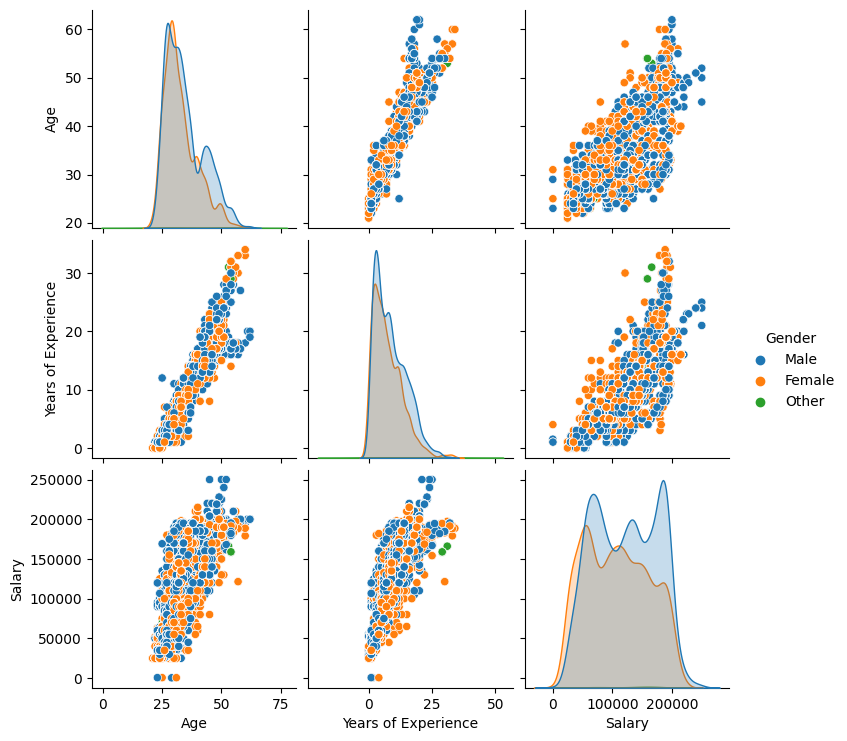

In [17]:
sns.pairplot(df, hue='Gender')

Above is a pairplot with further grouping by gender. All genders seem to follow similar trends like salary increasing with age and years of experience. However, we can also see that while the general trend is the same, men seem to have a higher salary despite having similar qualifications as other genders.
Predictably, age and years of experience have a positive correlation. Due to salary and years of experience also having a positive correlation, salary also tends to increase with age. Interesingly, we can see that there is a weak pattern in which women with more years of experience are paid the same as men who have less years of experience.

<AxesSubplot: xlabel='Education Level', ylabel='Salary'>

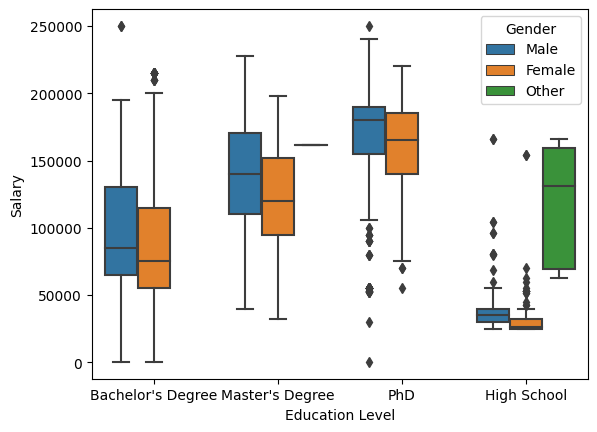

In [18]:
sns.boxplot(x='Education Level', y='Salary', data=df, hue='Gender')

Salary seems to increase with higher education levels. Those with high school degrees have the smallest range, although there are a few who seem to earn more than even 50% of people with Bachelor's, Master's, and PhD's. On the other hand, the outliers for those with PhDs seem to earn less than those with less higher education. Overall, the shape of the salary distribution for those with PhD's is slightly skewed right, showing that most people with PhD's are on the higher end of the spectrum. The salary range is the widest for those with Bachelor's degrees, ranging from 0.
Despite these differences between education levels, it appears that women earn less than men.

<AxesSubplot: xlabel='Race', ylabel='Salary'>

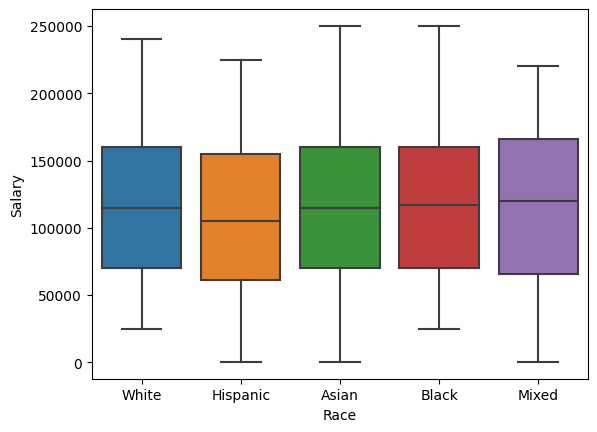

In [19]:
sns.boxplot(x='Race', y='Salary', data=df)

We can see that Hispanics, Asians, and Mixed races have the lowest salaries while Asians and Black people have some of the highest salaries. Overall, Hispanics seem to have a lower salary distribution compared to other races whereas White people seem to have a higher salary distribution despite not having some of the highest salaries. Asians have the widest range of salaries.

<AxesSubplot: xlabel='Country', ylabel='Salary'>

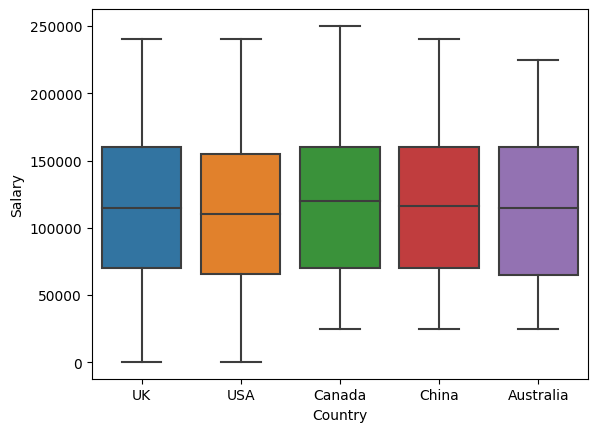

In [20]:
sns.boxplot(x='Country', y='Salary', data=df)

The UK and USA have similar salary distributions with USA having slightly more lower salaries. Canada, China, and Australia have similar minimum salaries, but Canada has the largest salary range out of the three while Australia has the smallest. The medians and the bulk of most people's salaries for all countries seem to be similar, with the biggest differences being the minimum and maximum salaries.

<AxesSubplot: xlabel='Years of Experience', ylabel='Salary'>

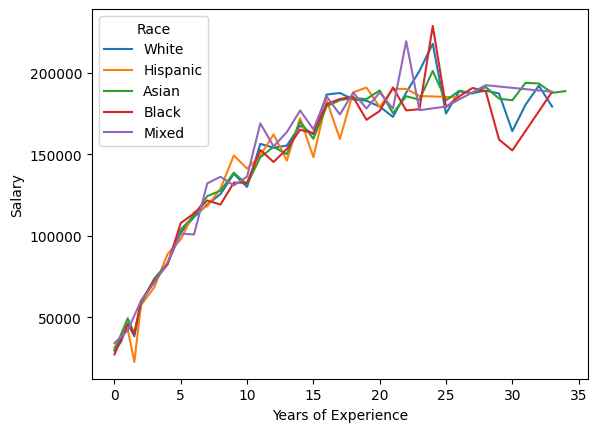

In [21]:
sns.lineplot(x='Years of Experience', y='Salary', hue='Race', errorbar=None, data=df)

It seems like the general trend of salary vs years of experience is similar across all races. Salary seems to increase with a logarithmic growth with a steep increase between 0 and 5 years of experience while mostly stabilizing after 20 years of experience. Amongst the races, it seems like Hispanics have the most up and downs, or discrepencies from the general pattern. 

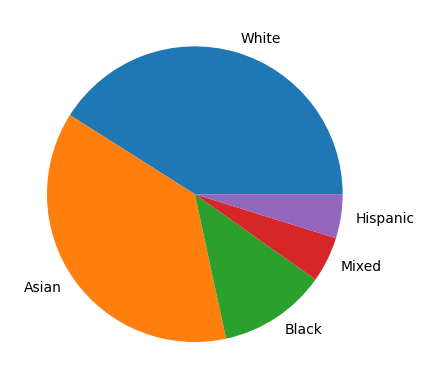

In [22]:
race_count = df['Race'].value_counts()
plt.pie(race_count, labels=race_count.index)
plt.show()

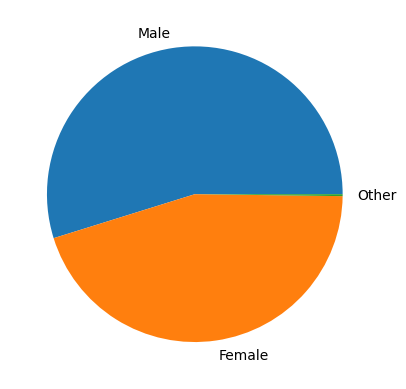

In [23]:
genders = df['Gender'].value_counts()
plt.pie(genders, labels=genders.index)
plt.show()

Most of the people surveyed were male, and only a select few selected "other" as their gender. The data for people who fall under that category will most likely not be representative of the general trend of all people that don't fall under male or female.

In [24]:
highest_jobs = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
highest_ppl = df[df['Job Title'].isin(highest_jobs.index)]

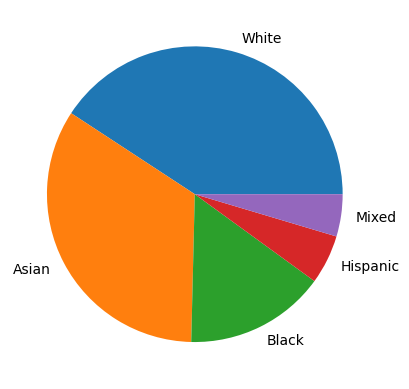

In [25]:
highest_paid_races = highest_ppl['Race'].value_counts()
plt.pie(highest_paid_races, labels=highest_paid_races.index)
plt.show()

This chart shows the distribution of races of the 10 most highest paying jobs. According to the graph, White people and Asians make up most of the highest paying jobs.

In [26]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

te = TargetEncoder()
te.fit(df['Job Title'], df['Salary'])
df['Job Title'] = te.transform(df['Job Title'])

df.replace({'High School':0, 'Bachelor\'s Degree':1, 'Master\'s Degree':2, 'PhD':3}, inplace=True)
df = pd.get_dummies(columns=['Gender', 'Country', 'Race'], data=df)

Job Title has high cardinality, so we can encode that using target encoding while we can encode the categorical columns with low cardinality (Gender, Country, and Race) using one-hot encoding. The Education Level column gets ordinal encoding because the categories can be put in order (high school being the lowest to PhD being the highest).

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = df.drop('Salary', axis=1)
y = df['Salary']
ss = StandardScaler()
X = ss.fit_transform(X)

We can finish the preprocessing process with standardizing the data.

# Model Training and Predictions

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], train_size=0.8, random_state=0)

In [69]:
model = RandomForestRegressor(n_estimators=150, min_samples_split=3, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(pred, y_test)

65548912.215385824

In [72]:
from sklearn.metrics import r2_score
r2_score(pred,y_test)

0.9764317618397432